<a href="https://colab.research.google.com/github/MANUELANDRESGV/How-to-implement-an-ML-pipeline/blob/master/VALIDACIONCRUZADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import decomposition 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression


In [ ]:
data = pd.read_csv('data.csv')#LECTURA DAT

In [ ]:
data.columns

Index(['Unnamed: 0', 'CreatedDate', 'StartDate', 'UpdatedDate',
       'EstimatedClosureDate', 'ClosureDate', 'EndDate', 'ProjectId',
       'ProjectStatusId', 'Status', 'BranchName', 'ProductType',
       'PortfolioType', 'SectorType', 'SubSectorType', 'CustomerId',
       'SalesManagerIdentity', 'PMIdentity', 'PreSaleManagerIdentity',
       'CurrencyIdentity', 'ExchangeRateFixed', 'SaleSubtotal', 'SaleDiscount',
       'SaleTotal', 'PurchaseSubtotal', 'ExpenseTotal', 'PurchaseTotal',
       'Utility', 'BaseSaleSubtotal', 'BaseSaleDiscount', 'BaseSaleTotal',
       'BasePurchaseSubtotal', 'BaseExpenseTotal', 'BasePurchaseTotal',
       'BaseUtility', 'BaseInitialRealCost', 'BaseInvoicedTotal',
       'NextSaleinvoiceAmount', 'BaseNextSaleinvoiceAmount'],
      dtype='object')

In [ ]:
# Eliminación de columnas NO RELEVANTES para la prediccion

In [ ]:
data= data.drop(['Unnamed: 0',  'StartDate', 'UpdatedDate',                     
       'EstimatedClosureDate', 'ClosureDate', 'EndDate', 'ProjectId',
        'Status', 'PurchaseSubtotal', 'ExpenseTotal', 'PurchaseTotal',
       'Utility', 'BaseSaleSubtotal', 'BaseSaleDiscount', 'BaseSaleTotal',
       'BasePurchaseSubtotal', 'BaseExpenseTotal', 'BasePurchaseTotal',
       'BaseUtility', 'BaseInitialRealCost', 'BaseInvoicedTotal',
       'NextSaleinvoiceAmount', 'BaseNextSaleinvoiceAmount','PMIdentity',
        'PreSaleManagerIdentity',
       'CurrencyIdentity', 'ExchangeRateFixed','CustomerId'
       ], axis=1)

In [ ]:
columnas = data.columns

In [ ]:
# Columnas seleccionadas

In [ ]:
columnas                                                        

Index(['CreatedDate', 'ProjectStatusId', 'BranchName', 'ProductType',
       'PortfolioType', 'SectorType', 'SubSectorType', 'SalesManagerIdentity',
       'SaleSubtotal', 'SaleDiscount', 'SaleTotal'],
      dtype='object')

In [ ]:
# CREACION DE TABLA DE CATEGORIAS (data2)

In [ ]:
columnasCat=pd.DataFrame(data.loc[:,[ 'BranchName','ProductType', 'PortfolioType', 'SectorType', 'SubSectorType' ]])

In [ ]:
def categoria(columna):
  new_data = data[columna]
  new_data = new_data.astype('category')
  new_data = new_data.cat.codes  
  return new_data

In [ ]:

C2=pd.DataFrame(categoria('BranchName'))
C3=pd.DataFrame(categoria( 'ProductType'))
C4=pd.DataFrame(categoria('PortfolioType'))
C5=pd.DataFrame(categoria('SectorType'))
C6=pd.DataFrame(categoria('SubSectorType'))


In [ ]:
C3=C3.rename(columns={0:'ProductType'})

In [ ]:
C2=C2.rename(columns={0:'BranchName'})

In [ ]:
C4=C4.rename(columns={0:'PortfolioType'})

In [ ]:
C5=C5.rename(columns={0:'SectorType'})

In [ ]:
C6=C6.rename(columns={0:'SubSectorType'})

In [ ]:
data2 = pd.concat([C2,C3,C4,C5,C6], axis=1)

In [ ]:
data2

,BranchName,ProductType,PortfolioType,SectorType,SubSectorType
0,0,3,7,5,7
1,0,3,7,5,7
2,0,3,3,6,9
3,5,2,7,5,7
4,3,2,7,5,7
...,...,...,...,...,...
4195,0,4,5,6,9
4196,0,5,5,6,9
4197,0,5,0,6,9
4198,0,5,2,5,7


In [ ]:
# CREACION DE TABLA DE FECHA DE VENTA

In [ ]:
fecha=data['CreatedDate']

In [ ]:
creacion=pd.DataFrame({'CreatedDate':pd.to_datetime(fecha)})

In [ ]:
creacion['año']=creacion['CreatedDate'].dt.year

In [ ]:
creacion['mes']=creacion['CreatedDate'].dt.month

In [ ]:
creacion['dia']=creacion['CreatedDate'].dt.day

In [ ]:
creacion=creacion.drop(['CreatedDate'],axis=1)

In [ ]:
# Eliminacion de Elementos modificados de la tabla original

In [ ]:
data=data.drop(['BranchName','ProductType', 'PortfolioType', 'SectorType', 'SubSectorType','CreatedDate'],axis=1)

In [ ]:
data

,ProjectStatusId,SalesManagerIdentity,SaleSubtotal,SaleDiscount,SaleTotal
0,1,487,-0.146508,-0.025552,-0.145327
1,1,487,-0.134001,-0.025552,-0.136870
2,1,487,-0.093690,-0.025552,-0.092412
3,2,773,-0.140009,-0.025552,-0.138816
4,2,996,-0.018438,-0.025552,-0.017023
...,...,...,...,...,...
4195,9,251,-0.140780,-0.025552,-0.139589
4196,5,248,-0.146132,-0.025552,-0.144950
4197,5,248,-0.147079,-0.025552,-0.145899
4198,5,248,-0.146433,-0.025552,-0.145252


In [ ]:
# CONCATENACION DE TABLAS EN data2

In [ ]:
data2 = pd.concat([data2,data,creacion], axis=1)

In [ ]:
data2

,BranchName,ProductType,PortfolioType,SectorType,SubSectorType,ProjectStatusId,SalesManagerIdentity,SaleSubtotal,SaleDiscount,SaleTotal,año,mes,dia
0,0,3,7,5,7,1,487,-0.146508,-0.025552,-0.145327,2022,1,14
1,0,3,7,5,7,1,487,-0.134001,-0.025552,-0.136870,2022,1,14
2,0,3,3,6,9,1,487,-0.093690,-0.025552,-0.092412,2022,1,14
3,5,2,7,5,7,2,773,-0.140009,-0.025552,-0.138816,2022,1,14
4,3,2,7,5,7,2,996,-0.018438,-0.025552,-0.017023,2022,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,4,5,6,9,9,251,-0.140780,-0.025552,-0.139589,2017,9,8
4196,0,5,5,6,9,5,248,-0.146132,-0.025552,-0.144950,2017,9,1
4197,0,5,0,6,9,5,248,-0.147079,-0.025552,-0.145899,2017,9,1
4198,0,5,2,5,7,5,248,-0.146433,-0.025552,-0.145252,2017,9,1


In [ ]:
data2.to_csv('data1.csv', index=False)

In [ ]:
class Data(object):
    def __init__(self):
        self.root_dir = os.path.join(os.getcwd(), os.pardir) #directory where data is located. In our case the data is in the project root directory
        self.data_dir = os.path.join(self.root_dir, 'data', 'raw')
        self.raw = None #stores raw data

    def get(self, file_name):
        data = pd.read_csv(os.path.join(self.data_dir, file_name))
        self.raw = data
        return data.info()
        
    
    def plot(self, feature=None, target=None, color=None):
        assert self.raw is not None, "Use get(file_name) method to import data"
        fig = px.scatter(x=self.raw[feature], y=self.raw[target], color=color)
        fig.show()
        
    #Unsupervised learning algortihms
    
    def pca(self, features, target):
        #feature engineering: reduce dimensionality    
        pca = decomposition.PCA(n_components='mle')
        principal_components = pca.fit_transform(features)
        principal_components = pd.DataFrame(principal_components)
        columns = [f'PC{index}' for index in principal_components]
        principal_components.columns = columns
        return pd.concat([principal_components, target], axis=1)
    
    def kmeans(self, features, num_clusters):
        #Classify using k-means
        k_means = KMeans(num_clusters).fit(features)
        identified_clusters = k_means.predict(features)
        return pd.concat([pd.DataFrame(features), pd.DataFrame(identified_clusters)], axis=1)

    #Supervised learning algorithm
    def make_ds(self, features, split=0.001):
        data = self.kmeans(features, num_clusters=2)
        
        train_labels = data.iloc[:int(len(data)*split),-1]
        train_data = data.iloc[:int(len(data)*split),:-2]
        
        test_labels = data.iloc[int(len(data)*split):,-1]
        test_data = data.iloc[int(len(data)*split):,:-2]
        
        return train_data, train_labels, test_data, test_labels
    
    def logistic_regression(self, features):
        train_data, train_labels, test_data, test_labels = self.make_ds(features)
        clf = LogisticRegression(random_state=0).fit(train_data, train_labels)
        prediction = clf.predict(test_data)
        return confusion_matrix(test_labels.to_numpy(), prediction)
    
    def svm(self, features):
        train_data, train_labels, test_data, test_labels = self.make_ds(features)
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(train_data, train_labels)
        prediction = clf.predict(test_data)
        return confusion_matrix(test_labels.to_numpy(), prediction)
    
    def knn(self, features, n_neighbors=3):
        train_data, train_labels, test_data, test_labels = self.make_ds(features)
        neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
        neigh.fit(train_data, train_labels)
        prediction = neigh.predict(test_data)
        return confusion_matrix(test_labels.to_numpy(), prediction)

In [ ]:
data3=Data()

In [ ]:
data3.get('/content/data1.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BranchName            4200 non-null   int64  
 1   ProductType           4200 non-null   int64  
 2   PortfolioType         4200 non-null   int64  
 3   SectorType            4200 non-null   int64  
 4   SubSectorType         4200 non-null   int64  
 5   ProjectStatusId       4200 non-null   int64  
 6   SalesManagerIdentity  4200 non-null   int64  
 7   SaleSubtotal          4200 non-null   float64
 8   SaleDiscount          4200 non-null   float64
 9   SaleTotal             4200 non-null   float64
 10  año                   4200 non-null   int64  
 11  mes                   4200 non-null   int64  
 12  dia                   4200 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 426.7 KB


In [ ]:
# Normalizacion  de datos

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [ ]:
data4=mean_norm(data3.raw)

In [ ]:
# ESTABLECIMIENTO DEL CONJUNTO DE ENTRENAMIENTO Y OBJETIVO A PREDECIR

In [ ]:
train_data=data4

In [ ]:
target_data = data3.raw[['ProductType']]

In [ ]:
target_data = target_data[1:].reset_index().drop('index', axis=1)
train_data = train_data[:-1]

In [ ]:
target_data.shape

(4199, 1)

In [ ]:
train_data.shape

(4199, 13)

In [ ]:
train_data = np.array(train_data)

In [ ]:
target_data= np.array(target_data)

In [ ]:
# Conjunto de Validacion

In [ ]:
X=train_data

In [ ]:
y=target_data

In [ ]:
from sklearn.model_selection import KFold


# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]


In [ ]:
# MODELO

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=( 13))) #Input layer
model.add(tf.keras.layers.Flatten())

#Hidden layers
#model.add(tf.keras.layers.Dense(10, activation=None)) #Linear
 #Non-linear
model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.Dense(6, activation='softmax',kernel_regularizer=tf.keras.regularizers.L2(.3))) #Output layer
#model.add(tf.keras.layers.Dense(1, activation=None)) #Output layer

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),#'mse',#
             metrics=['accuracy'],#'mae'],#
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))#optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 6)                 3

In [ ]:
target_data #NO DEBE DE ESTAR NORMALIZADO POR  LA FUNCION DE ERROR

array([[3],
       [3],
       [2],
       ...,
       [5],
       [5],
       [5]])

In [ ]:
train_data

array([[-0.60076258, -0.00383104,  1.38051667, ...,  2.25539416,
        -1.76665113, -0.21541787],
       [-0.60076258, -0.00383104,  1.38051667, ...,  2.25539416,
        -1.76665113, -0.21541787],
       [-0.60076258, -0.00383104, -0.57551606, ...,  2.25539416,
        -1.76665113, -0.21541787],
       ...,
       [-0.60076258,  1.68989307,  0.40250031, ..., -2.06528431,
         0.61678505, -1.68859116],
       [-0.60076258,  1.68989307, -2.0425406 , ..., -2.06528431,
         0.61678505, -1.68859116],
       [-0.60076258,  1.68989307, -1.06452424, ..., -2.06528431,
         0.61678505, -1.68859116]])

In [ ]:
history = model.fit(train_data, target_data , batch_size=512, epochs=1500,validation_data=(X_val, y_val))#,validation_data=(val_data,val_target_data)

Epoch 1/1500
9/9 [==============================] - 4s 223ms/step - loss: 5.2319 - accuracy: 0.3953 - val_loss: 5.0728 - val_accuracy: 0.4768
Epoch 2/1500
9/9 [==============================] - 1s 143ms/step - loss: 4.9630 - accuracy: 0.4863 - val_loss: 4.8360 - val_accuracy: 0.4768
Epoch 3/1500
9/9 [==============================] - 1s 141ms/step - loss: 4.7589 - accuracy: 0.4863 - val_loss: 4.6638 - val_accuracy: 0.4768
Epoch 4/1500
9/9 [==============================] - 1s 167ms/step - loss: 4.5929 - accuracy: 0.4863 - val_loss: 4.5072 - val_accuracy: 0.4768
Epoch 5/1500
9/9 [==============================] - 1s 163ms/step - loss: 4.4561 - accuracy: 0.4863 - val_loss: 4.3787 - val_accuracy: 0.4756
Epoch 6/1500
9/9 [==============================] - 1s 148ms/step - loss: 4.3324 - accuracy: 0.5161 - val_loss: 4.2662 - val_accuracy: 0.5125
Epoch 7/1500
9/9 [==============================] - 1s 135ms/step - loss: 4.2236 - accuracy: 0.5275 - val_loss: 4.1603 - val_accuracy: 0.5197
Epoch 

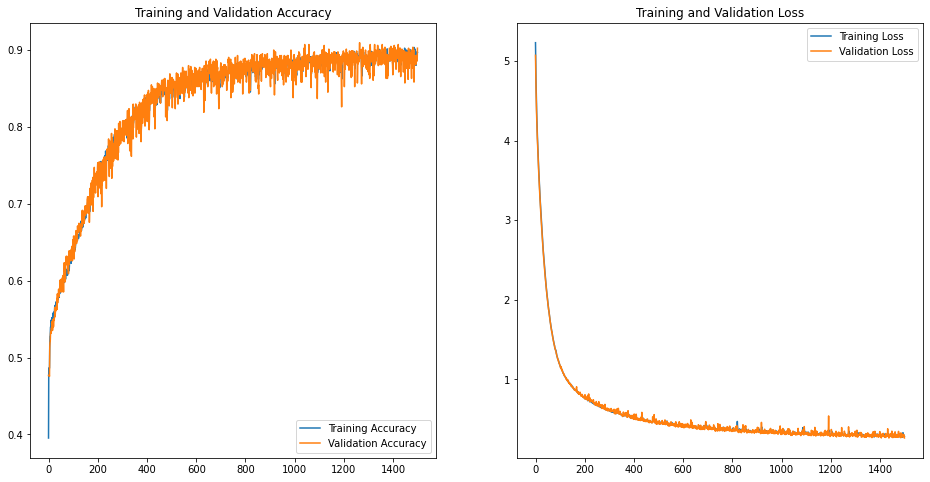

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1500)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

model.evaluate(X_val, y_val)

27/27 [==============================] - 0s 7ms/step - loss: 0.2622 - accuracy: 0.9023


[0.26223233342170715, 0.9022645950317383]